In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
import io
from scipy import misc

In [65]:
data=pd.read_csv("nv (2).csv")

In [66]:
data

,outlook,temp,Humidity,Wind,Play_Tennis
0,Sunny,hot,high,weak,no
1,Sunny,hot,high,strong,no
2,overcast,hot,high,weak,yes
3,Rain,mild,high,weak,yes
4,Rain,cool,normal,weak,yes
5,Rain,cool,normal,strong,no
6,overcast,cool,normal,strong,yes
7,Sunny,mild,high,weak,no
8,Sunny,cool,normal,weak,yes
9,Rain,mild,normal,weak,yes


In [67]:
encode=LabelEncoder()


In [68]:
data['outlook']=encode.fit_transform(data.outlook)
data['temp']=encode.fit_transform(data.temp)
data['Humidity']=encode.fit_transform(data.Humidity)
data['Wind']=encode.fit_transform(data.Wind)
data['Play_Tennis']=encode.fit_transform(data.Play_Tennis)

In [69]:
data

,outlook,temp,Humidity,Wind,Play_Tennis
0,1,1,0,1,0
1,1,1,0,0,0
2,2,1,0,1,1
3,0,2,0,1,1
4,0,0,1,1,1
5,0,0,1,0,0
6,2,0,1,0,1
7,1,2,0,1,0
8,1,0,1,1,1
9,0,2,1,1,1


In [70]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [72]:
classifier=DecisionTreeClassifier(criterion = "entropy")

In [73]:
classifier.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [74]:
pred_y=classifier.predict(x)

In [75]:
pred_y

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [76]:
y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: Play_Tennis, dtype: int32

In [77]:
accuracy_score(y,pred_y)

1.0

In [78]:
confusion_matrix(y,pred_y)

array([[5, 0],
       [0, 9]], dtype=int64)

# classifier(splitting)

In [89]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [90]:
pred_y=classifier.predict(x_test)

In [91]:
pred_y

array([0, 1, 0])

In [92]:
y_test

8    1
6    1
4    1
Name: Play_Tennis, dtype: int32

In [93]:
accuracy_score(y_test,pred_y)

0.3333333333333333

In [94]:
confusion_matrix(y_test,pred_y)

array([[0, 0],
       [2, 1]], dtype=int64)

In [95]:
import pydotplus

from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz

In [96]:
a = x_train.columns

In [97]:
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,feature_names = a, filled=True,rounded=True)

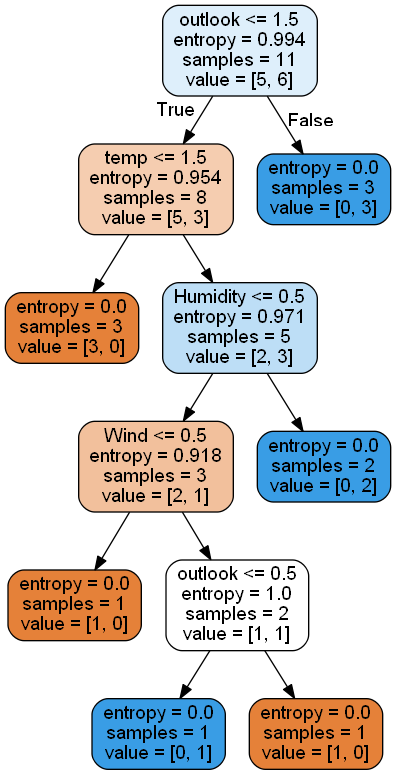

In [98]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())